<h1> Geometric Operations and Other Mathematical Tools</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image. 


<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling  </li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>


</ul>


----


Download the image for the lab:


In [158]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will import the following:


In [159]:
import matplotlib.pyplot as plt   # Thư viện vẽ biểu đồ và hiển thị hình ảnh
import cv2                        # Thư viện OpenCV dùng cho xử lý ảnh và video
import numpy as np                # Thư viện làm việc với mảng và tính toán số học


First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [160]:
def plot_image(image_1, image_2, title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))      # Tạo khung hiển thị kích thước 10x10 inch

    plt.subplot(1, 2, 1)             # Chia khung thành 1 hàng 2 cột, chọn ô thứ 1
    plt.imshow(image_1, cmap="gray") # Hiển thị ảnh thứ nhất dưới dạng ảnh xám
    plt.title(title_1)               # Đặt tiêu đề cho ảnh thứ nhất

    plt.subplot(1, 2, 2)             # Chọn ô thứ 2 trong khung
    plt.imshow(image_2, cmap="gray") # Hiển thị ảnh thứ hai dưới dạng ảnh xám
    plt.title(title_2)               # Đặt tiêu đề cho ảnh thứ hai

    plt.show()                       # Hiển thị toàn bộ hình ra màn hình


#  Geometric Transformations


 Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.


## Scaling 


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


Consider the following image with the corresponding intensity values:


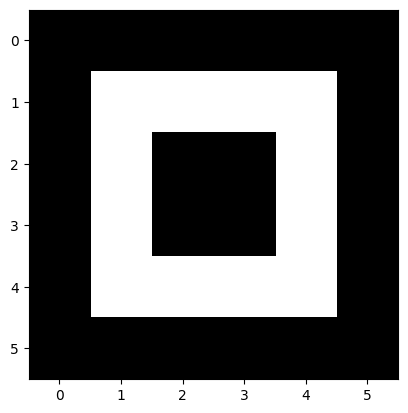

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [161]:
toy_image = np.zeros((6,6))        # Tạo ảnh giả kích thước 6x6, tất cả pixel = 0 (màu đen)

toy_image[1:5, 1:5] = 255          # Gán vùng trung tâm thành màu trắng (giá trị 255)

toy_image[2:4, 2:4] = 0            # Tạo một ô vuông nhỏ màu đen bên trong vùng trắng

plt.imshow(toy_image, cmap='gray') # Hiển thị ảnh giả dưới dạng ảnh xám
plt.show()                         # Hiển thị ảnh ra màn hình

toy_image                          # In ma trận giá trị pixel của ảnh


We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis


The parameter interpolation estimates pixel values based on neighboring pixels. <code>INTER_NEAREST</code> uses the nearest pixel and <code>INTER_CUBIC</code> uses several pixels near the pixel value we would like to estimate.


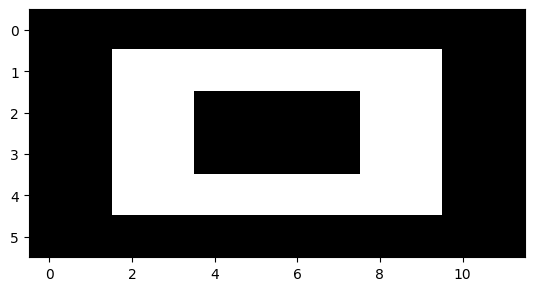

In [162]:
new_toy = cv2.resize(
    toy_image, 
    None, 
    fx=2, fy=1,                      # Phóng to chiều ngang gấp 2, giữ nguyên chiều dọc
    interpolation=cv2.INTER_NEAREST  # Nội suy láng giềng gần nhất (giữ nguyên pixel)
)

plt.imshow(new_toy, cmap='gray')    # Hiển thị ảnh sau khi resize
plt.show()                          # Hiện ảnh ra màn hình


Consider the following image:


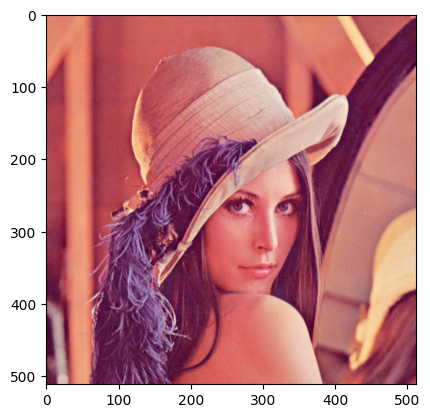

In [163]:
image = cv2.imread("lenna.png")                 # Đọc ảnh từ file bằng OpenCV (mặc định là BGR)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu bằng matplotlib

plt.show()                                      # Hiển thị ảnh ra màn hình


We can scale the horizontal axis by two and leave the vertical axis as is:


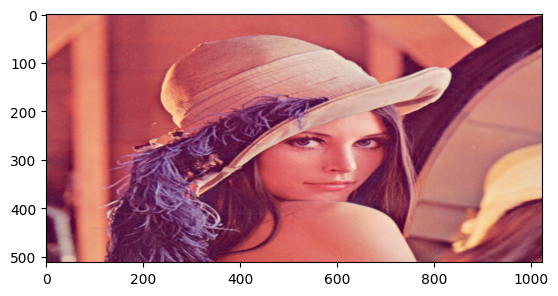

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [164]:
new_image = cv2.resize(
    image, 
    None, 
    fx=2, fy=1,                        # Phóng to chiều ngang gấp 2, giữ nguyên chiều dọc
    interpolation=cv2.INTER_CUBIC      # Nội suy bậc ba → ảnh mượt hơn khi phóng to
)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển BGR → RGB để hiển thị đúng màu

plt.show()                             # Hiển thị ảnh sau khi resize

print("old image shape:", image.shape, 
      "new image shape:", new_image.shape)
# In kích thước ảnh gốc và ảnh mới (height, width, channels)


In the same manner, we can scale the vertical axis by two:


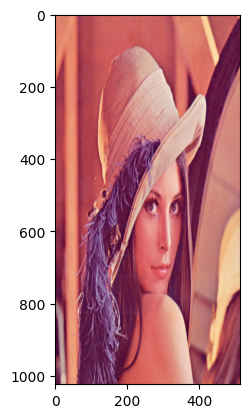

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [165]:
new_image = cv2.resize(
    image,
    None,
    fx=1, fy=2,                        # Giữ nguyên chiều ngang, phóng to chiều dọc gấp 2
    interpolation=cv2.INTER_CUBIC      # Nội suy bậc ba → ảnh mượt khi phóng to
)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()                             # Hiển thị ảnh sau khi resize

print("old image shape:", image.shape,
      "new image shape:", new_image.shape)
# In kích thước ảnh trước và sau khi resize


We can scale the horizontal axis and vertical axis by two.


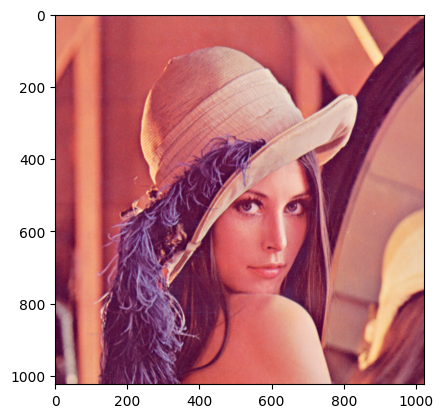

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [166]:
new_image = cv2.resize(
    image,
    None,
    fx=2, fy=2,                        # Phóng to ảnh gấp 2 lần cả chiều ngang và chiều dọc
    interpolation=cv2.INTER_CUBIC      # Nội suy bậc ba → ảnh mượt, ít răng cưa
)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()                             # Hiển thị ảnh sau khi phóng to

print("old image shape:", image.shape,
      "new image shape:", new_image.shape)
# So sánh kích thước ảnh trước và sau khi resize


We can also shrink the image by setting the scaling factor to a real number between 0 and 1:


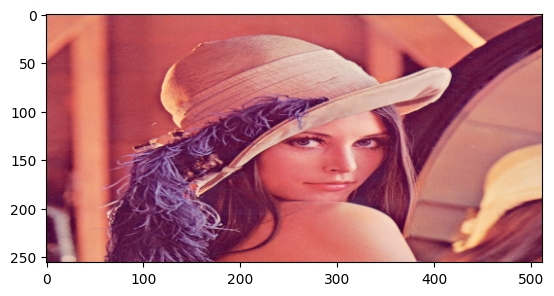

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [167]:
new_image = cv2.resize(
    image,
    None,
    fx=1, fy=0.5,                      # Giữ nguyên chiều ngang, giảm chiều dọc còn một nửa
    interpolation=cv2.INTER_CUBIC      # Nội suy bậc ba → ảnh mượt khi thay đổi kích thước
)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()                             # Hiển thị ảnh sau khi resize

print("old image shape:", image.shape,
      "new image shape:", new_image.shape)
# So sánh kích thước ảnh trước và sau khi resize


We can  also specify the number of rows and columns:


In [168]:
rows = 100    # Số hàng (chiều cao) của ảnh / ma trận
cols = 200    # Số cột (chiều rộng) của ảnh / ma trận


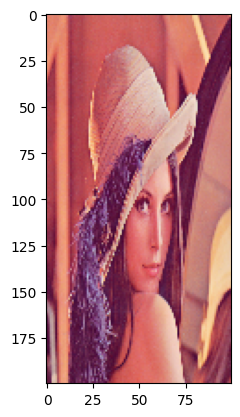

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [169]:
new_image = cv2.resize(
    image,
    (100, 200),                        # Resize ảnh về kích thước cố định (width=100, height=200)
    interpolation=cv2.INTER_CUBIC      # Nội suy bậc ba → ảnh mượt hơn
)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()                             # Hiển thị ảnh sau khi resize

print("old image shape:", image.shape,
      "new image shape:", new_image.shape)
# So sánh kích thước ảnh trước và sau khi resize


## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image. 

In this example, we shift the image 100 pixels horizontally:


In [170]:
tx = 100    # Độ dịch chuyển theo trục x (dịch sang phải 100 pixel)
ty = 0      # Độ dịch chuyển theo trục y (không dịch theo chiều dọc)

M = np.float32([[1, 0, tx], [0, 1, ty]])  
# Ma trận biến đổi affine dùng để tịnh tiến (translation) ảnh

M           # Hiển thị ma trận tịnh tiến


array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

The shape of the image is given by:


In [171]:
rows, cols, _ = image.shape   # Lấy chiều cao (rows), chiều rộng (cols) của ảnh, bỏ qua số kênh màu


We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


In [172]:
new_image = cv2.warpAffine(image, M, (cols, rows))
# Áp dụng phép biến đổi affine (tịnh tiến) lên ảnh
# M: ma trận biến đổi
# (cols, rows): kích thước ảnh đầu ra (width, height)


We can plot the image; the portions of the image that do not have any intensities are set to zero:


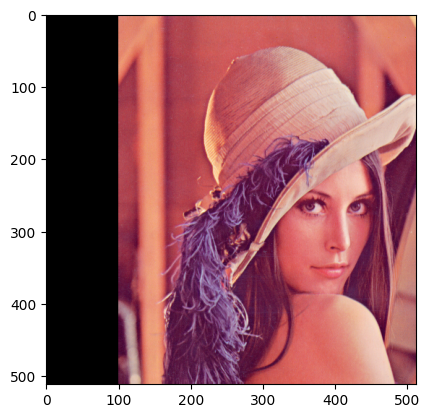

In [173]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu bằng matplotlib

plt.show()   # Hiển thị ảnh ra màn hình


We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:


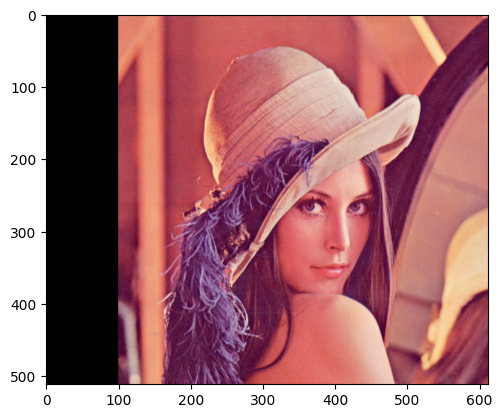

In [174]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
# Áp dụng phép tịnh tiến ảnh với kích thước ảnh mới lớn hơn
# cols + tx, rows + ty giúp ảnh sau khi dịch không bị cắt mất

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()   # Hiển thị ảnh ra màn hình


We can shift the image horizontally:


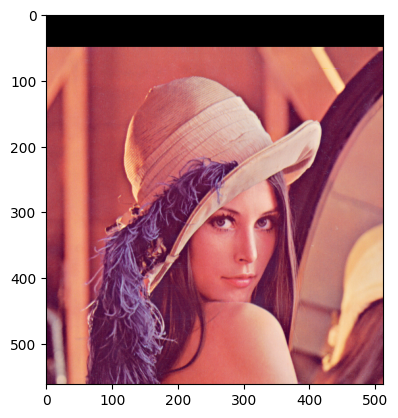

In [175]:
tx = 0      # Độ dịch chuyển theo trục x (không dịch ngang)
ty = 50     # Độ dịch chuyển theo trục y (dịch xuống 50 pixel)

M = np.float32([[1, 0, tx], [0, 1, ty]])
# Ma trận biến đổi affine dùng để tịnh tiến ảnh

new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
# Áp dụng phép tịnh tiến theo trục y
# Tăng kích thước ảnh đầu ra để không bị cắt mất ảnh

plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()   # Hiển thị ảnh ra màn hình


## Rotation 


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


We can rotate our toy image by 45 degrees:


In [176]:
theta = 45.0   # Góc xoay ảnh 45 độ (ngược chiều kim đồng hồ)

M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
# Tạo ma trận xoay ảnh quanh điểm (3, 3) với tỉ lệ giữ nguyên

new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))
# Áp dụng phép xoay lên ảnh toy_image, kích thước ảnh đầu ra là 6x6


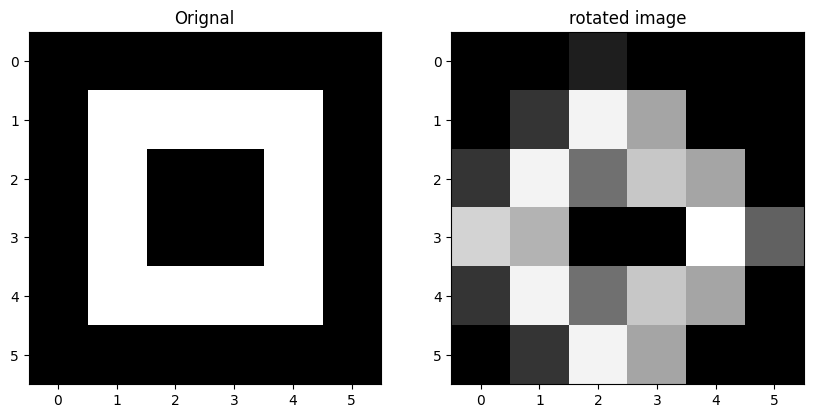

In [177]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")
# Hiển thị ảnh gốc và ảnh sau khi xoay để so sánh


Looking at intensity values, we see that many values have been interpolated:


In [178]:
new_toy_image   # Hiển thị ma trận giá trị pixel của ảnh toy sau khi xoay


array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

We can perform the same operation on color images:


In [179]:
cols, rows, _ = image.shape   # Lấy kích thước ảnh: cols = height, rows = width (theo thứ tự shape)


In [180]:
M = cv2.getRotationMatrix2D(
    center=(cols // 2 - 1, rows // 2 - 1),  # Tọa độ tâm xoay (gần trung tâm ảnh)
    angle=theta,                           # Góc xoay (độ, ngược chiều kim đồng hồ)
    scale=1                                # Giữ nguyên kích thước ảnh
)

new_image = cv2.warpAffine(image, M, (cols, rows))
# Áp dụng phép xoay affine lên ảnh, kích thước ảnh đầu ra giữ nguyên


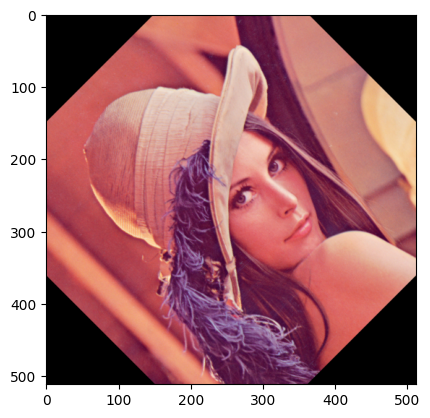

In [181]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu bằng matplotlib

plt.show()   # Hiển thị ảnh ra màn hình


# Mathematical Operations 


## Array Operations 


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 


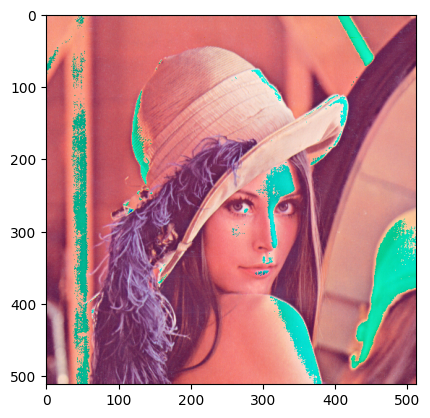

In [182]:
new_image = image + 20    # Tăng giá trị mỗi pixel lên 20 → ảnh sáng hơn

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()               # Hiển thị ảnh ra màn hình


We can also multiply every pixel's intensity value by a constant value.


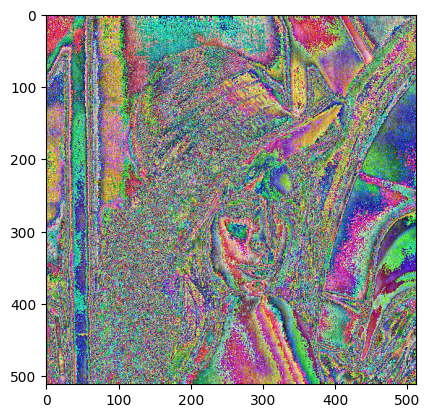

In [183]:
new_image = 10 * image    # Nhân giá trị mỗi pixel lên 10 → ảnh sáng rất mạnh

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()               # Hiển thị ảnh ra màn hình


We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [184]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
# Tạo nhiễu Gaussian: trung bình = 0, độ lệch chuẩn = 20, kích thước bằng ảnh
# Ép kiểu sang uint8 (0–255) để phù hợp với kiểu dữ liệu ảnh → làm mất giá trị âm

Noise.shape
# Trả về kích thước của ma trận nhiễu: (số hàng, số cột, 3 kênh màu)


(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


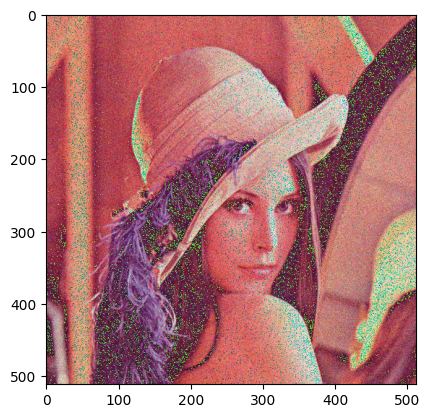

In [185]:
new_image = image + Noise
# Cộng nhiễu (Noise) vào ảnh gốc (image) để tạo ảnh bị nhiễu
# Mỗi pixel của ảnh được tăng/giảm giá trị theo nhiễu tương ứng

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ hệ màu BGR (OpenCV) sang RGB để hiển thị đúng màu

plt.show()
# Hiển thị ảnh lên màn hình


At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result. 


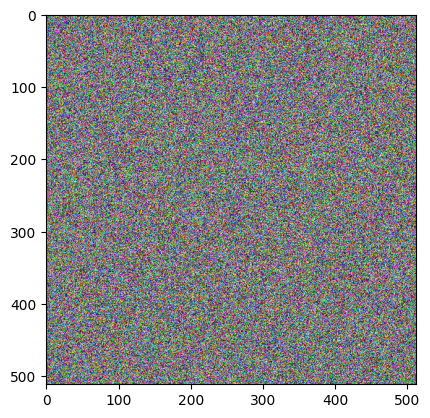

In [186]:
new_image = image * Noise
# Nhân từng pixel của ảnh gốc với nhiễu (Noise)
# Tạo nhiễu kiểu nhân (multiplicative noise), làm ảnh biến dạng mạnh hơn so với cộng nhiễu

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu

plt.show()
# Hiển thị ảnh kết quả


## Matrix Operations 


Grayscale images are matrices. Consider the following grayscale image:


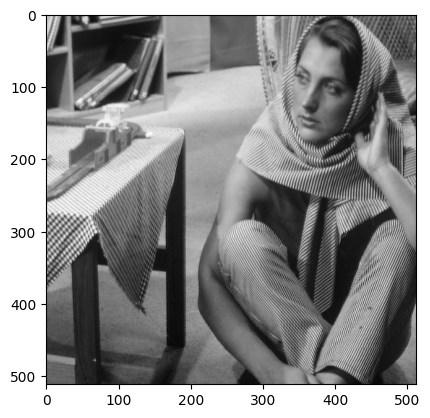

In [187]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
# Đọc ảnh từ file 'barbara.png' ở chế độ ảnh xám (1 kênh)

im_gray.shape
# Trả về kích thước ảnh (số hàng, số cột)

plt.imshow(im_gray, cmap='gray')
# Hiển thị ảnh xám với bảng màu grayscale

plt.show()
# Hiển thị ảnh ra màn hình


We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [188]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)
# Thực hiện phân rã SVD (Singular Value Decomposition) cho ảnh xám im_gray
# im_gray được tách thành 3 thành phần

We see <code>s</code> is not rectangular:


In [189]:
s.shape# Trả về kích thước (shape) của vector s

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [190]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
# Tạo ma trận S toàn số 0, cùng kích thước với ảnh xám im_gray

S[:image.shape[0], :image.shape[0]] = np.diag(s)
# Tạo ma trận đường chéo từ vector s (singular values)
# Gán ma trận đường chéo này vào góc trên-trái của S
# Các giá trị singular nằm trên đường chéo chính, các phần còn lại = 0


We can plot the matrix `U` and `V`:


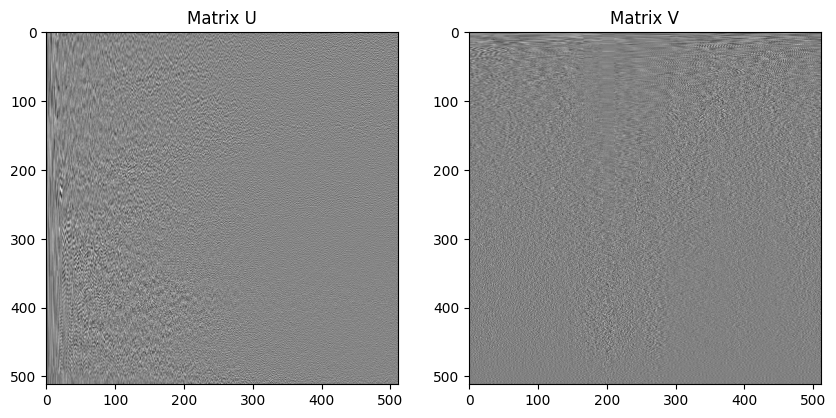

In [191]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")
# Gọi hàm plot_image để hiển thị 2 ảnh cạnh nhau
# U: ma trận trực giao bên trái trong SVD (các vector riêng theo chiều dọc)
# V: ma trận trực giao bên phải trong SVD (các vector riêng theo chiều ngang)
# title_1, title_2: tiêu đề cho từng hình ảnh


We see most of the elements in `S` are zero:


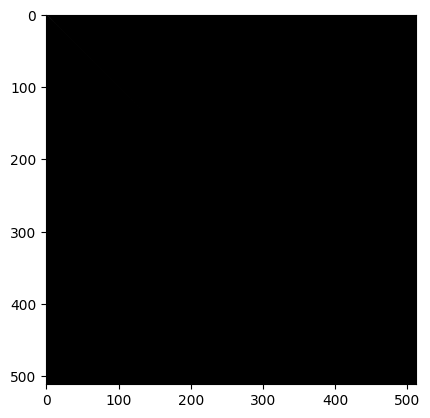

In [192]:
plt.imshow(S, cmap='gray')
# Hiển thị ma trận S dưới dạng ảnh xám
# Các giá trị lớn trên đường chéo sáng hơn, phần còn lại (0) màu tối

plt.show()
# Hiển thị hình ảnh ra màn hình


We can find the matrix product of all the matrices. First, we can perform matrix multiplication on `S` and `U` and assign it  to `B` and plot the results: 


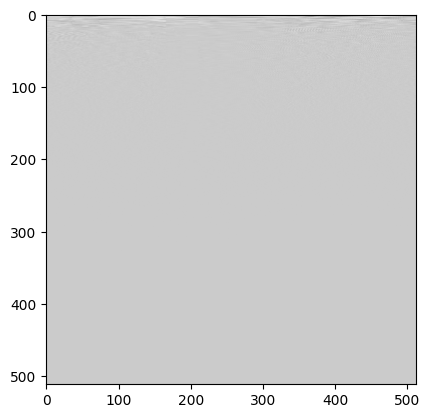

In [193]:
B = S.dot(V)
# Nhân ma trận S với V để tạo ma trận trung gian B

plt.imshow(B, cmap='gray')
# Hiển thị ma trận B dưới dạng ảnh xám

plt.show()
# Hiển thị kết quả


We can find the matrix product of `U`, `S`, and `B`. We see it’s the entire image:


In [194]:
A = U.dot(B)
# Nhân ma trận U với B để khôi phục lại ảnh A (xấp xỉ ảnh gốc)


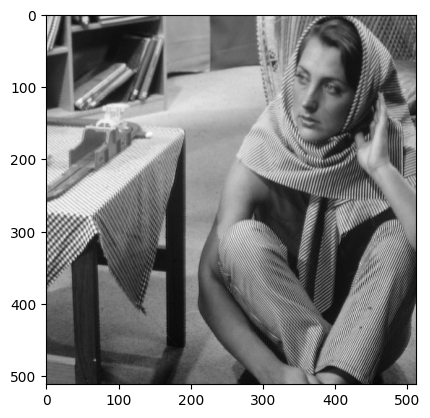

In [195]:
plt.imshow(A, cmap='gray')
# Hiển thị ảnh A (ảnh được tái tạo từ SVD) ở dạng xám

plt.show()
# Hiển thị hình ảnh


It turns out many elements are redundant, so we can eliminate some rows and columns of `S` and `V` and approximate the image by finding the product.


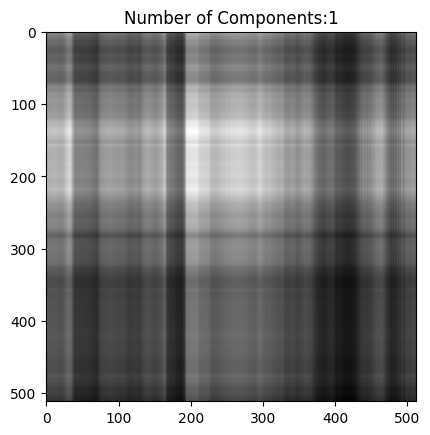

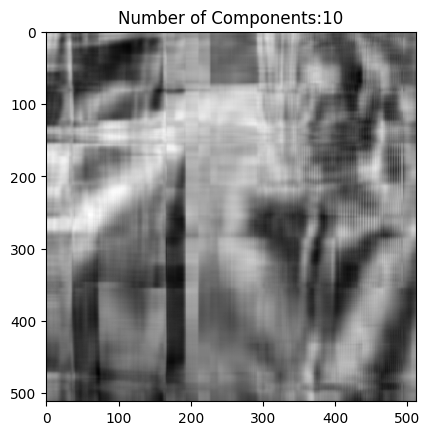

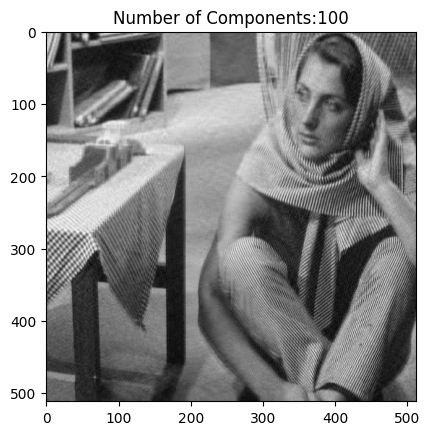

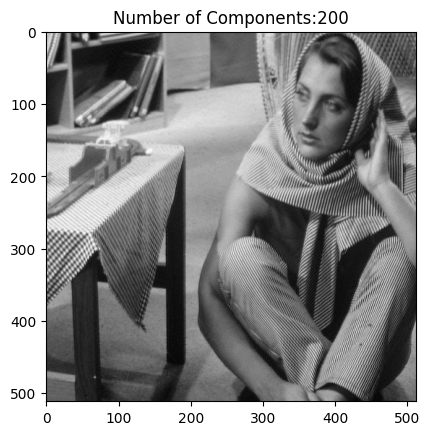

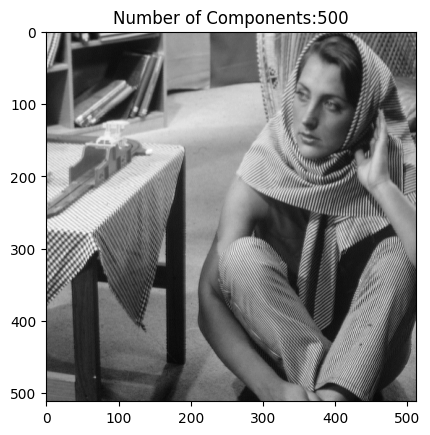

In [196]:
for n_component in [1, 10, 100, 200, 500]:
    # Lặp qua số lượng singular values dùng để khôi phục ảnh

    S_new = S[:, :n_component]
    # Lấy n_component cột đầu của S (giữ lại các giá trị quan trọng nhất)

    V_new = V[:n_component, :]
    # Lấy n_component hàng đầu của V

    A = U.dot(S_new.dot(V_new))
    # Khôi phục ảnh A với số thành phần đã chọn

    plt.imshow(A, cmap='gray')
    # Hiển thị ảnh xám

    plt.title("Number of Components:" + str(n_component))
    # Tiêu đề cho biết số thành phần sử dụng

    plt.show()
    # Hiển thị ảnh


We see we only need 100 to 200 Components to represent the image.


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>
-->



<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
